# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: 42

Número:  53687       Nome:   Ariana Dias  

Número:  51127       Nome:   Luís Ferreirinha

## 1. Processamento dos dados

(remover) Descrever e comentar os passos na leitura e processamento dos dados 

Para processarmos os dados vamos utilizar a biblioteca pandas e numpy

In [1]:
import pandas as pd
import numpy as np

Começamos por ler o ficheiro csv com os dados de treino e guarda-mos o conteúdo num dataframe.

In [2]:
df_train = pd.read_csv("train.csv")

Vamos confirmar que os dados foram corretamente importados

In [3]:
df_train

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2644,C,D-penicillamine,20296,F,N,N,N,N,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7,1.0
1,1,3492,C,Unknown,21915,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6,2.0
2,2,1702,C,D-penicillamine,18806,F,N,N,N,N,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6,1.0
3,3,3523,C,Unknown,14610,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2,2.0
4,4,3428,D,Placebo,13727,F,N,Y,Y,Y,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0,1.0
325,325,1899,C,Unknown,14975,M,Unknown,Unknown,Unknown,N,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0,4.0
326,326,1152,D,D-penicillamine,25546,M,N,Y,N,N,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9,3.0
327,327,71,D,D-penicillamine,18972,F,N,Y,Y,S,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6,4.0


Vamos extrair os valores das classes

In [4]:
y_train = df_train["Stage"].values
y_train

array([1., 2., 1., 2., 3., 4., 3., 4., 4., 4., 4., 1., 1., 3., 3., 1., 3.,
       4., 4., 4., 1., 2., 2., 2., 3., 2., 4., 4., 4., 4., 3., 1., 4., 4.,
       3., 3., 4., 3., 3., 2., 4., 3., 2., 2., 3., 3., 4., 3., 3., 2., 4.,
       4., 2., 2., 2., 3., 4., 1., 4., 1., 3., 2., 2., 3., 3., 4., 4., 4.,
       3., 3., 3., 4., 3., 3., 3., 2., 2., 4., 4., 3., 3., 3., 2., 2., 2.,
       4., 3., 4., 4., 3., 4., 4., 3., 4., 3., 3., 4., 3., 4., 2., 2., 3.,
       2., 2., 3., 2., 2., 4., 3., 4., 4., 4., 3., 2., 4., 2., 2., 4., 4.,
       3., 4., 4., 4., 3., 1., 2., 2., 4., 3., 2., 4., 2., 4., 4., 4., 4.,
       3., 3., 4., 2., 2., 3., 2., 2., 2., 3., 4., 4., 4., 3., 4., 4., 4.,
       3., 4., 2., 4., 4., 2., 3., 4., 2., 2., 3., 3., 3., 4., 4., 4., 3.,
       2., 1., 3., 3., 4., 3., 3., 4., 2., 3., 3., 2., 3., 4., 4., 2., 4.,
       2., 3., 3., 1., 4., 4., 1., 4., 2., 3., 4., 4., 3., 2., 3., 2., 4.,
       2., 3., 3., 4., 3., 2., 3., 4., 3., 2., 4., 4., 3., 3., 3., 4., 3.,
       4., 3., 4., 3., 4.

Como este conjunto de dados contém dados categóricos misturados com contínuos vamos ter de separar os categóricos e converter em dados binários utilizando o get_dummies()

In [5]:
df_categorical = df_train.select_dtypes([object])
df_categorical

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,C,D-penicillamine,F,N,N,N,N
1,C,Unknown,F,Unknown,Unknown,Unknown,N
2,C,D-penicillamine,F,N,N,N,N
3,C,Unknown,F,Unknown,Unknown,Unknown,N
4,D,Placebo,F,N,Y,Y,Y
...,...,...,...,...,...,...,...
324,C,D-penicillamine,F,N,N,N,N
325,C,Unknown,M,Unknown,Unknown,Unknown,N
326,D,D-penicillamine,M,N,Y,N,N
327,D,D-penicillamine,F,N,Y,Y,S


Também guardamos os atributos com variáveis continuas num outro dataframe, retiramos a coluna ID pois esta é uma variável independente e também a Stage porque representa as classes.

In [6]:
df_numerical = df_train.select_dtypes([np.number]).drop(columns=["ID","Stage"])
df_numerical

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2644,20296,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7
1,3492,21915,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6
2,1702,18806,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6
3,3523,14610,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2
4,3428,13727,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7
...,...,...,...,...,...,...,...,...,...,...,...
324,2255,22642,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0
325,1899,14975,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0
326,1152,25546,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9
327,71,18972,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6


Obtemos os dummies do dataframe das categóricas

In [7]:
df_categorical_dummies = pd.get_dummies(df_categorical)

column_names_dum = np.array(df_categorical_dummies.columns)

df_categorical_dummies

,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Drug_Unknown,Sex_F,Sex_M,Ascites_N,Ascites_Unknown,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Unknown,Hepatomegaly_Y,Spiders_N,Spiders_Unknown,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
325,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0
326,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0
327,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0


E agora juntam-mos os dois dataframes

In [8]:
df_train_processado = pd.concat([df_numerical, df_categorical_dummies], axis=1, join='inner')

df_train_processado

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Unknown,Hepatomegaly_Y,Spiders_N,Spiders_Unknown,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2644,20296,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,...,0,1,0,0,1,0,0,1,0,0
1,3492,21915,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,...,0,0,1,0,0,1,0,1,0,0
2,1702,18806,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,...,0,1,0,0,1,0,0,1,0,0
3,3523,14610,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,...,0,0,1,0,0,1,0,1,0,0
4,3428,13727,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2255,22642,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,...,0,1,0,0,1,0,0,1,0,0
325,1899,14975,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,...,0,0,1,0,0,1,0,1,0,0
326,1152,25546,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,...,0,0,0,1,1,0,0,1,0,0
327,71,18972,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,...,0,0,0,1,0,0,1,0,1,0


E assim obtemos a matrix com os valores

In [40]:
X_train = df_train_processado.values
X_train

array([[2.6440e+03, 2.0296e+04, 5.0000e-01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.4920e+03, 2.1915e+04, 6.0000e-01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.7020e+03, 1.8806e+04, 1.1000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.1520e+03, 2.5546e+04, 2.3000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.1000e+01, 1.8972e+04, 1.2200e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.8740e+03, 2.4257e+04, 6.0000e-01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

## 2. Ajustamento dos modelos


### 2.1. Teste de modelos e validação

(remover) Enunciar as várias abordagens testadas para
* Criar modelos
* Validar modelos
* Avaliar a qualidade dos modelos

Vamos agora criar modelos e avaliar a sua performance, para fazermos isso iremos realizar cross-validation sobre os dados de treino.

### Decision Tree  

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(criterion="entropy")

scores = cross_val_score(dtc,
                         X=X_train,
                         y=y_train,
                         cv=10
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	0.36363636363636365
	0.5151515151515151
	0.36363636363636365
	0.3939393939393939
	0.36363636363636365
	0.5757575757575758
	0.36363636363636365
	0.24242424242424243
	0.42424242424242425
	0.4375
Average CV accuracy: 0.404 +/- 0.087


Uma decision tree sem qualquer ajuste dos seus parâmetros tem uma accuracy terrível. Vamos tentar fazer melhor ajustando os seguintes parâmetros da decision tree:
```
max_depth
min_samples_split
min_samples_leaf
```
Vamos realizar uma pesquisa dos pârametros para determinar os melhores valores para estes parâmetros e vamos utilizar a average CV accuracy como métrica de desempenho

In [12]:
# Queremos descobrir a depth para pudermos determinar o dominio de procura deste parametro
dtc.fit(X_train,y_train)
dtc.get_depth()

12

In [13]:
param_grid = {'max_depth' : [i for i in range(2,13)], 'min_samples_split' : [i for i in range(2,50,2)], 'min_samples_leaf' : [i for i in range(2,50,2)]}

scores = {}
for depth in param_grid["max_depth"]:
    for samples_split in param_grid["min_samples_split"]:
        for samples_leaf in param_grid["min_samples_leaf"]:
            dtc_test = DecisionTreeClassifier(criterion="entropy", 
                                              max_depth=depth, 
                                              min_samples_split=samples_split,
                                              min_samples_leaf=samples_leaf)
            test_scores = cross_val_score(dtc_test,
                         X=X_train,
                         y=y_train,
                         cv=10)
            scores[(depth,samples_split,samples_leaf)] = [np.mean(test_scores), np.std(test_scores)]

In [33]:
best_param = max(scores, key=scores.get)
print("Os melhores parâmetros encontrados para este problema:")
print(f" - max_depth = {best_param[0]}\n - min_samples_split = {best_param[1]}\n - min_samples_leaf = {best_param[2]}")
print(f"Average CV accuracy: {scores[best_param][0]:%} +/- {scores[best_param][1]:%}")

Os melhores parâmetros encontrados para este problema:
 - max_depth = 5
 - min_samples_split = 22
 - min_samples_leaf = 10
Average CV accuracy: 49.535985% +/- 6.141805%


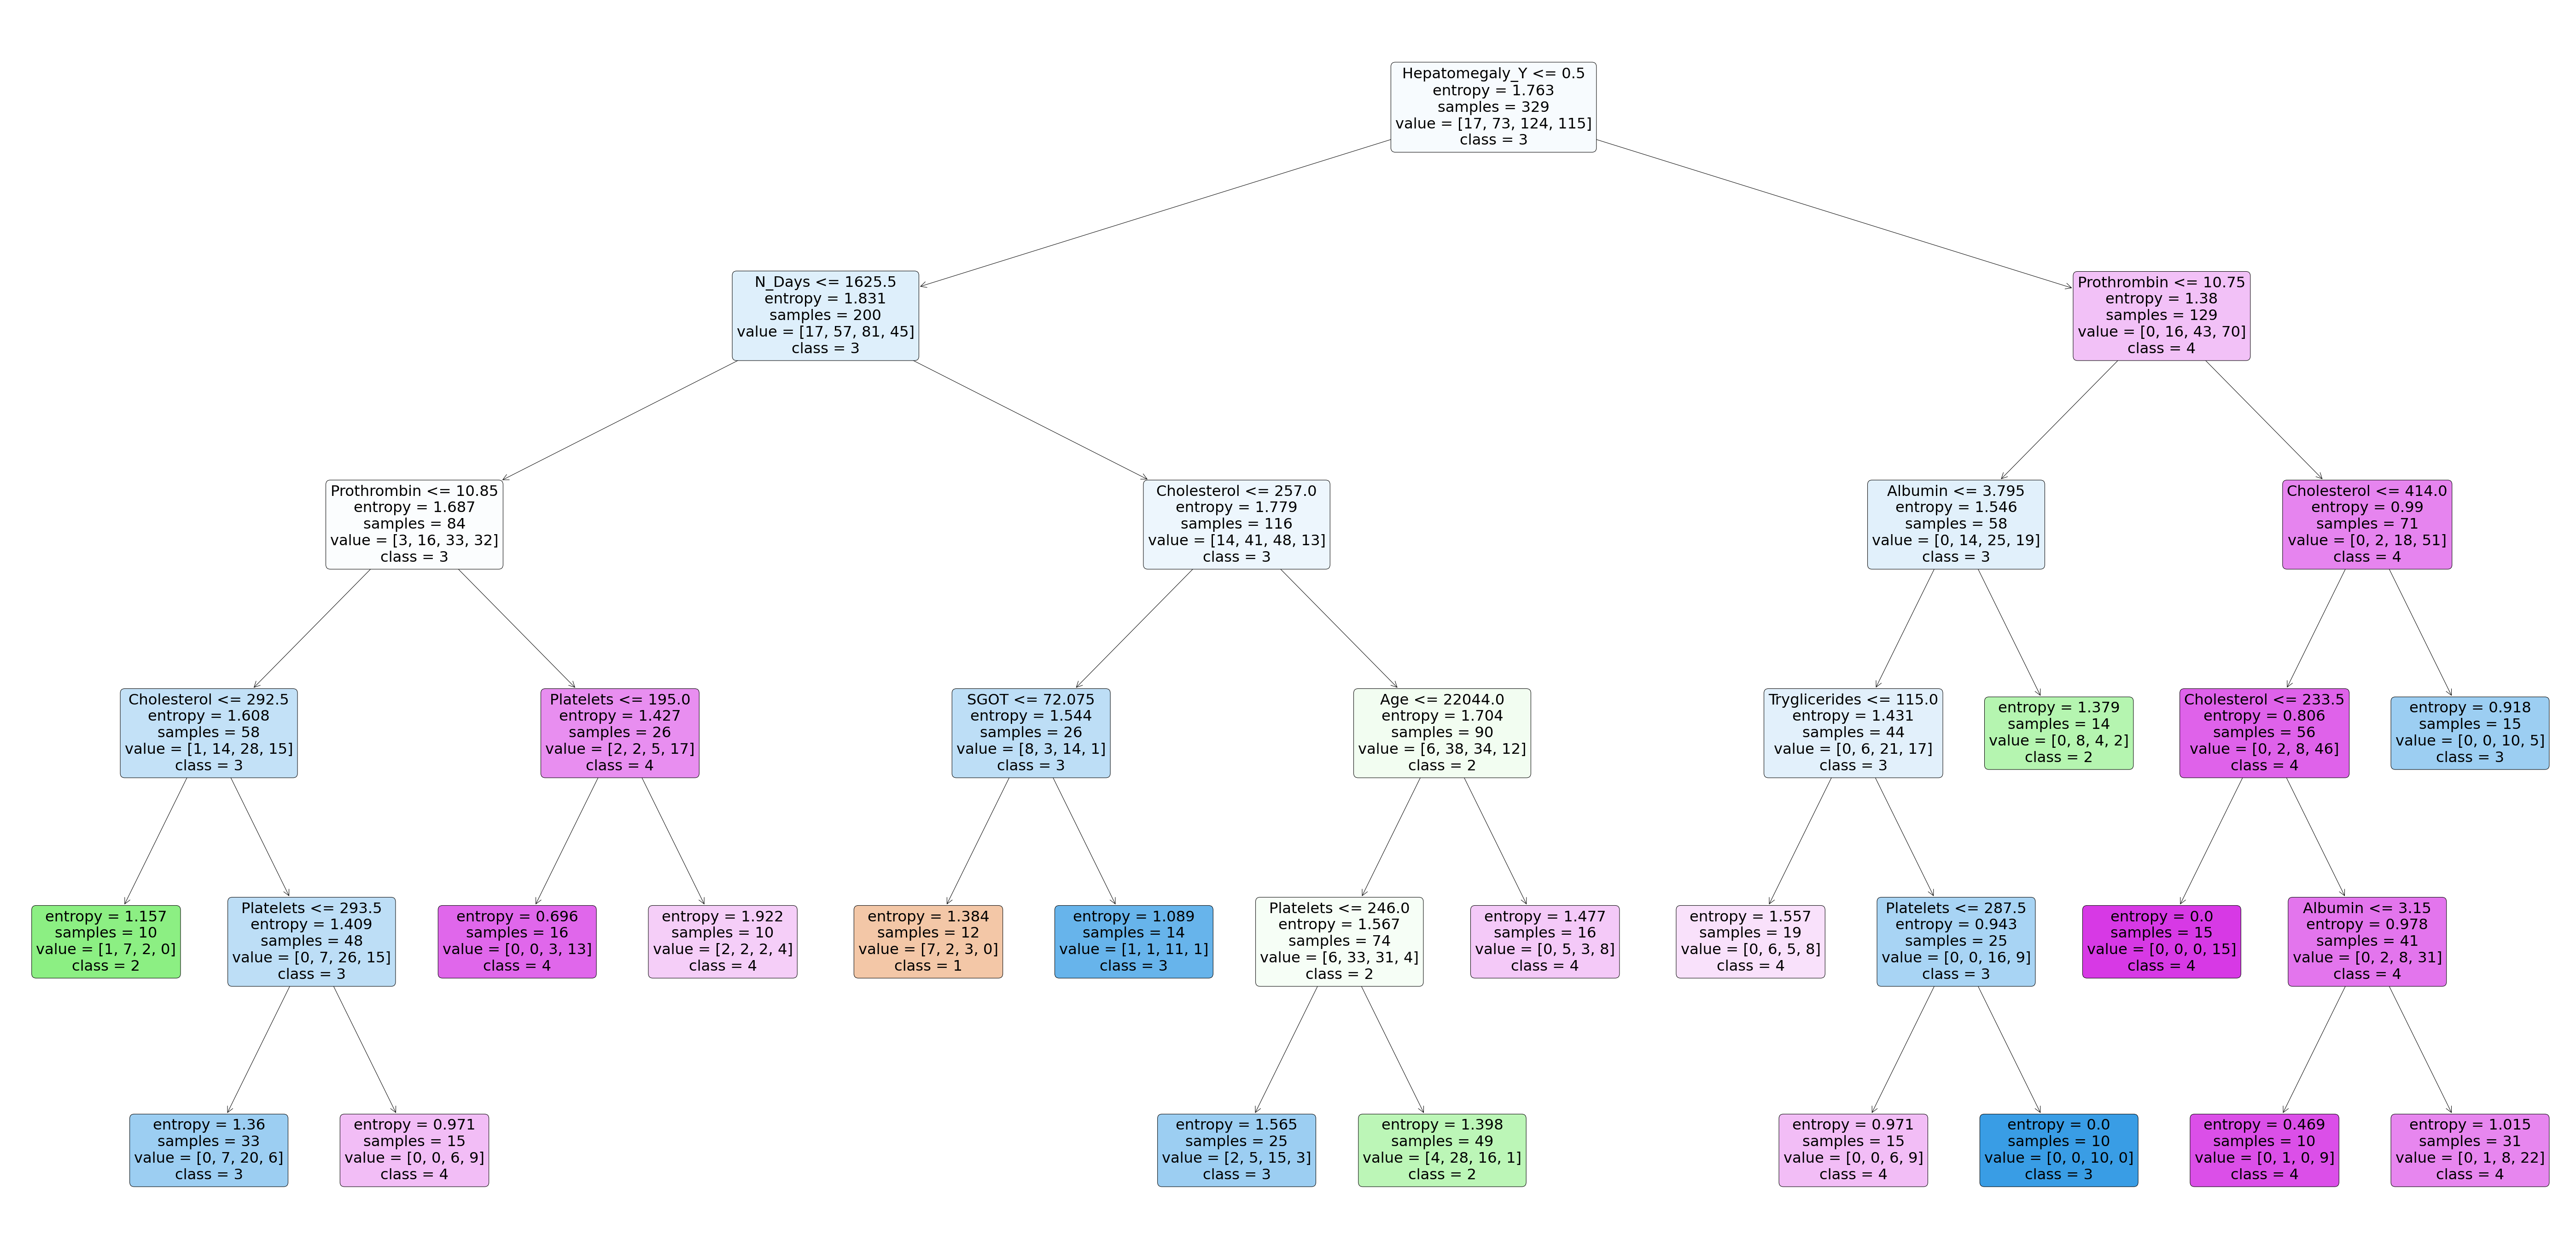

In [17]:
depth, split, leaf = best_param

dtc_best = DecisionTreeClassifier(criterion="entropy", max_depth=depth, min_samples_leaf=leaf, min_samples_split=split)
dtc_best.fit(X_train, y_train)
plt.figure(figsize=[100,50])
plot_tree(dtc_best,
          feature_names=df_train_processado.columns,
          class_names=["1","2","3","4"],
          filled=True, rounded=True)
plt.show()


### k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



### 2.2. Seleção e apresentação do melhor modelo

(remover) Apresentar todos os resultados para cada modelo obtido

* Elencar o critério de selecção
* Apresentar a árvore (se aplicável)
* Discutir os resultados


## 3. Validação do modelo final ajustado com um conjunto de validação independente

(remover) O ficheiro `test.csv` contém um conjunto de dados não usado para treinar o modelo definido no ponto #2. 
* Preparar o data set
* Correr o modelo selecionado como sendo o melhor nestes dados
* Apresentar os resultados para as métricas de validação
* Discutir os resultados alcançados confrontando os resultados com os obtidos anteriormente

## 4. Competição

(remover) Explicar os passos feitos para chegar à solução submetida na competição, tendo em conta:

* A escolha dos parâmetros usados pelos classificadores
* A escolha de atributos mais relevantes para a aprendizagem dos modelos
    